### Cement Strength Prediction

#### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings("ignore")

##### Loading the dataset

In [2]:
data = pd.read_csv('Concrete Compressive Strength.csv')

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [6]:
data.shape

(1030, 9)

In [7]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

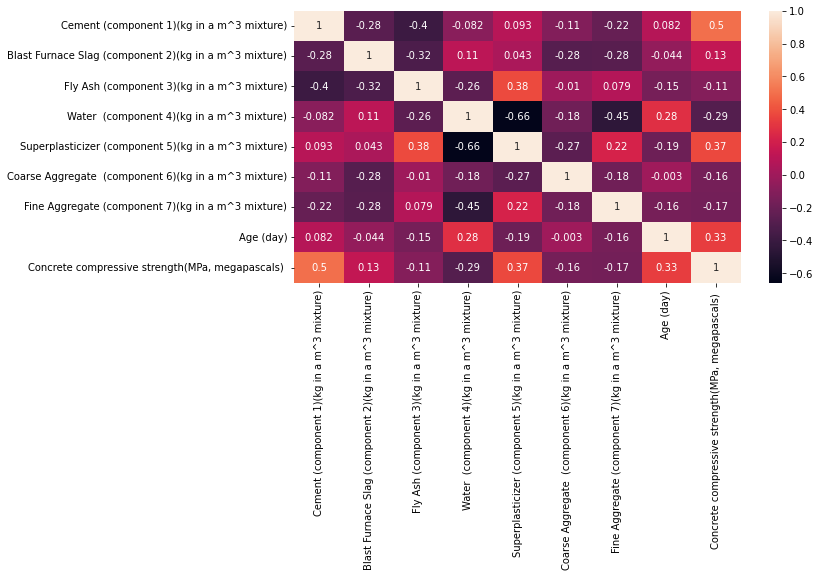

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)
plt.show();

In [9]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

#### Pairplot

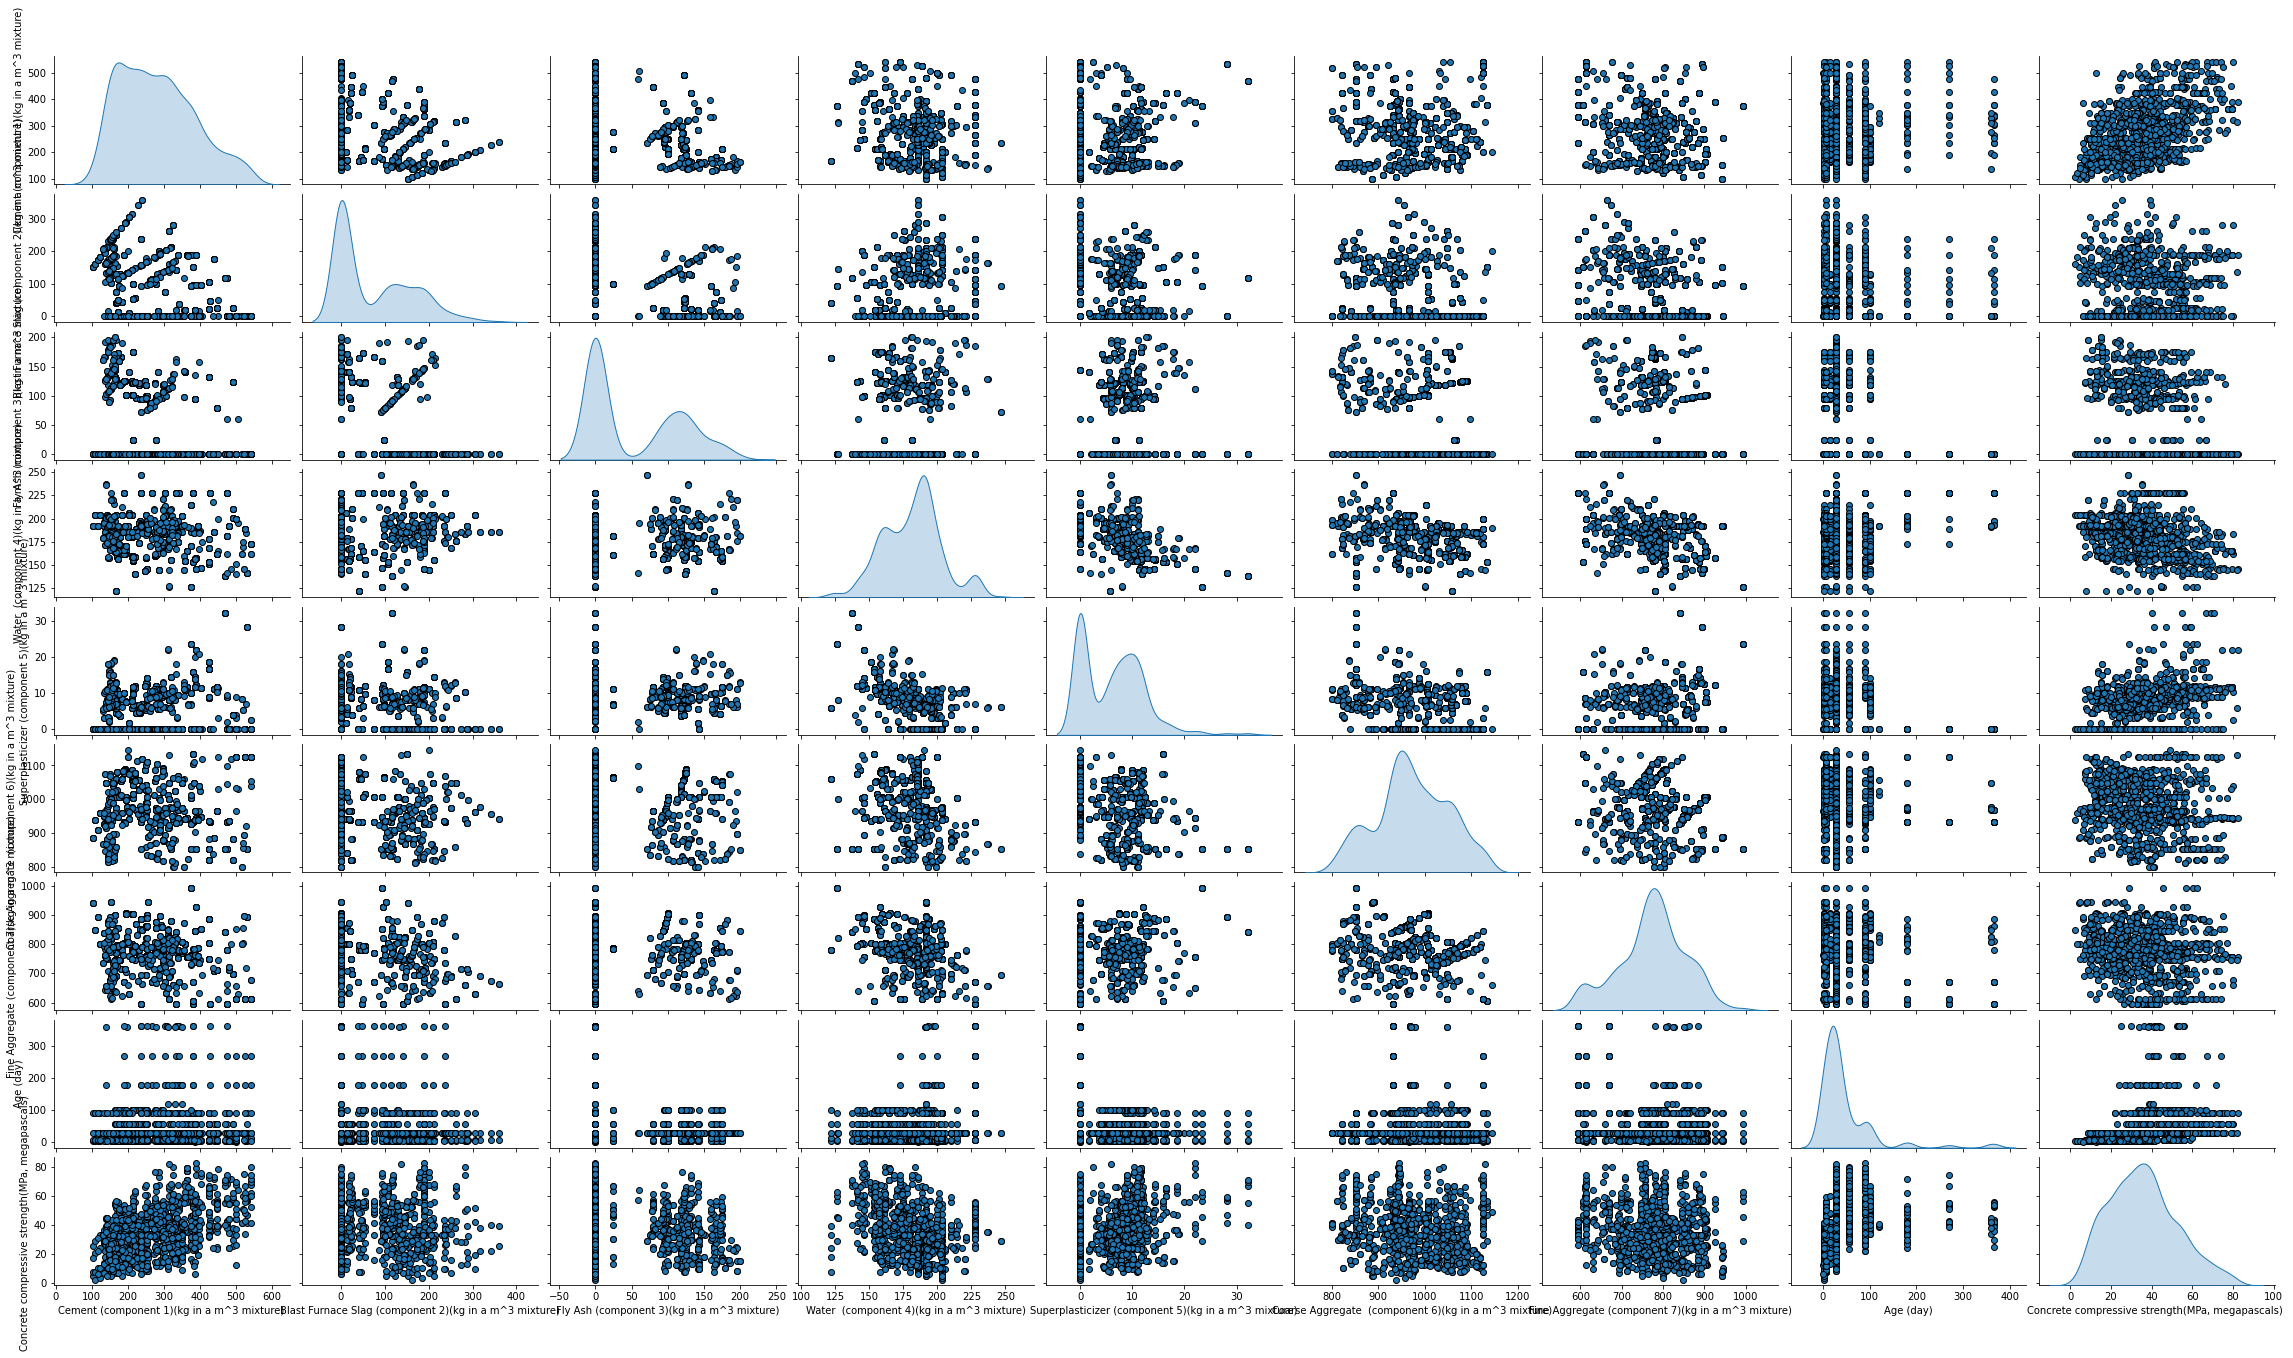

In [10]:
fig=sns.pairplot(data,height=2.0, aspect=1.8, 
                plot_kws={'edgecolor': 'k', 'linewidth': 1.0},
                diag_kind='kde', diag_kws={'shade': True})

##### Checking the distribution of data

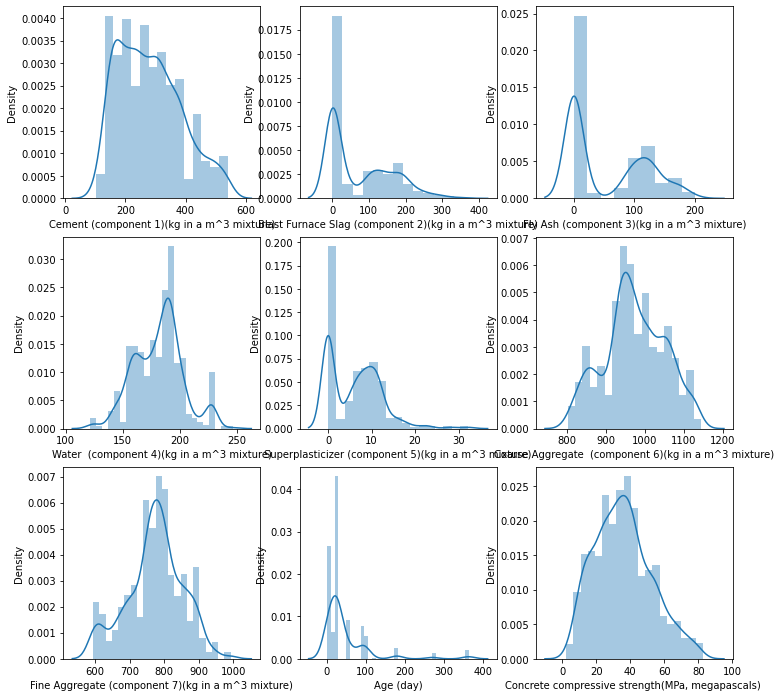

In [11]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in data.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

##### Selecting x and y

In [12]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [13]:
x = data.drop("Concrete compressive strength(MPa, megapascals) ", axis=1)

In [14]:
x

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [15]:
y = data["Concrete compressive strength(MPa, megapascals) "]

In [16]:
y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [17]:
for column in x.columns:
    x[column]+=1
    x[column]= np.log(x[column])

In [18]:
x

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296
1,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296
2,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.602119
3,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633
4,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878
...,...,...,...,...,...,...,...,...
1025,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296
1026,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296
1027,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296
1028,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296


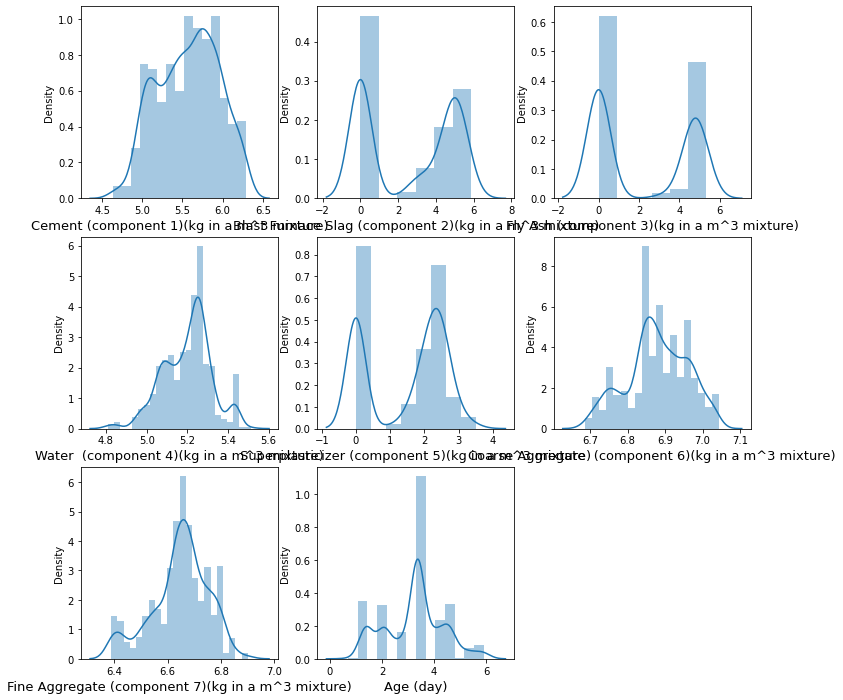

In [19]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber = 1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(x[column])
    plt.xlabel(column, fontsize=13)
    plotnumber+=1
plt.show()

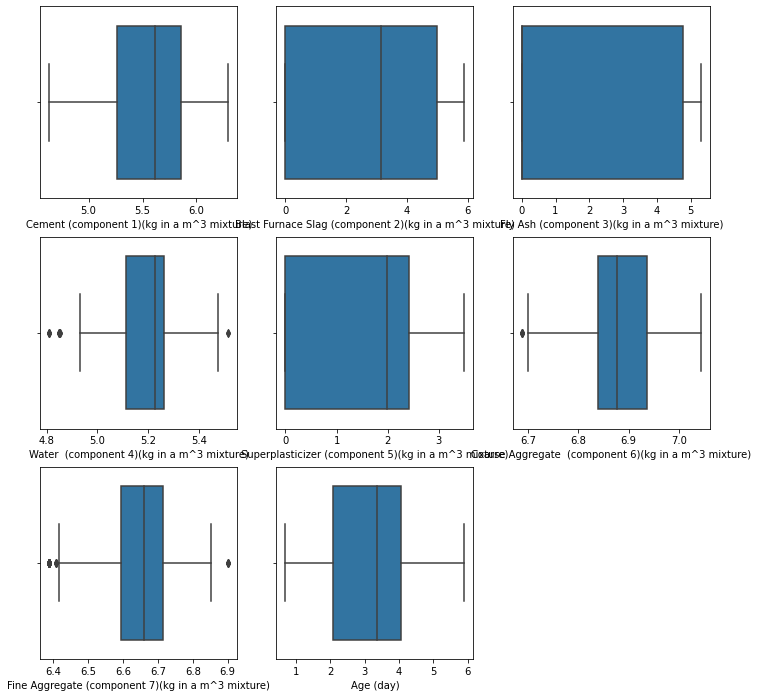

In [20]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x[column])
    plt.xlabel(column)
    plotnumber+=1
plt.show()

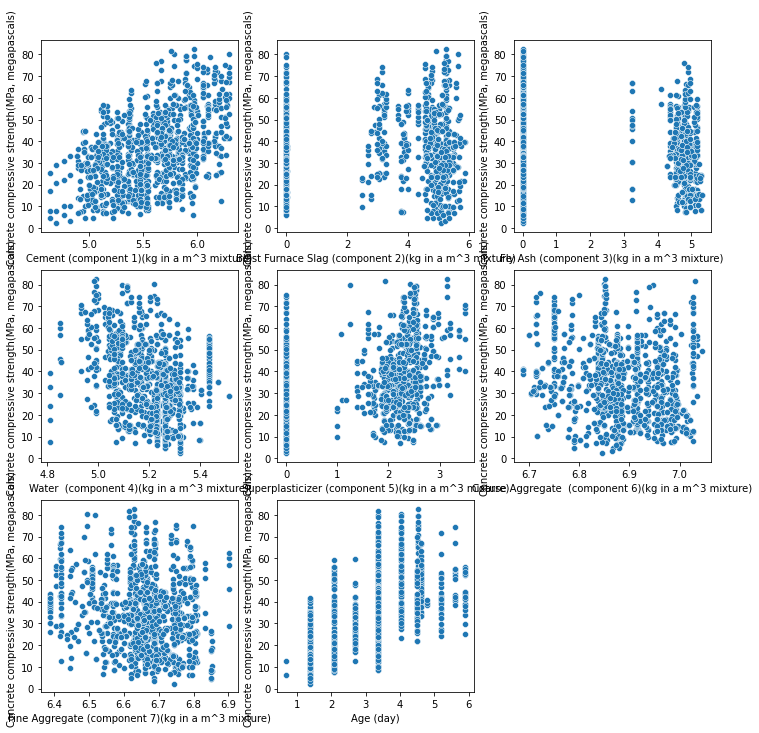

In [21]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.scatterplot(x[column],y)
    plt.xlabel(column)
    plotnumber+=1
plt.show()

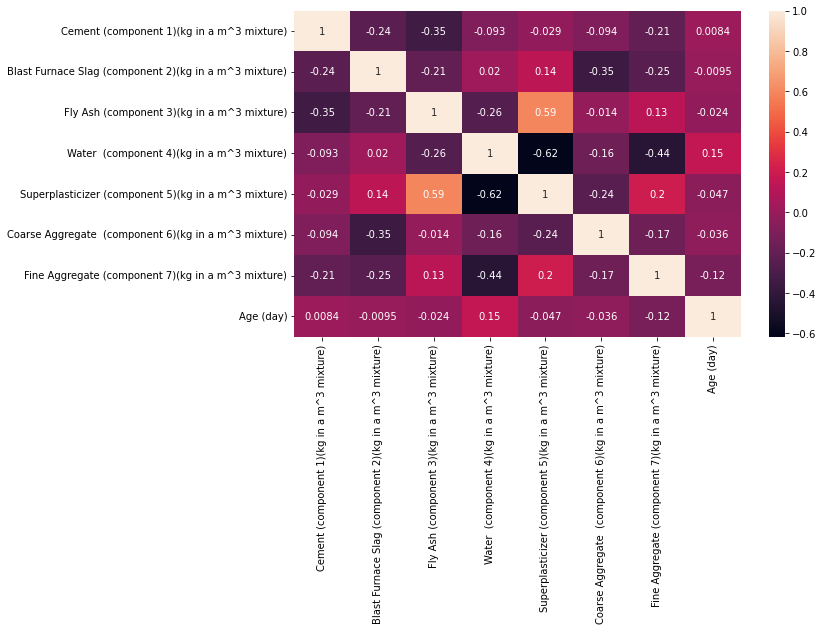

In [22]:
plt.figure(figsize=(10,6),facecolor='white')
sns.heatmap(x.corr(), annot=True);

In [23]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
x_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
196,5.276481,0.000000,4.620256,5.115716,2.137710,6.915128,6.810032,3.367296
631,5.786897,0.000000,0.000000,5.220356,0.000000,6.969791,6.664409,2.079442
81,5.767696,5.363637,0.000000,5.054333,2.727853,6.748877,6.781512,1.386294
526,5.886104,2.995732,4.955827,5.043425,2.477378,6.849066,6.687109,1.386294
830,5.093750,5.252273,5.003946,5.192957,2.995732,6.732211,6.609349,3.367296
...,...,...,...,...,...,...,...,...
87,5.660527,5.307773,0.000000,4.981550,2.501436,6.913340,6.690470,1.386294
330,5.512743,0.000000,4.836917,4.971894,2.564180,6.991913,6.686971,2.708050
466,5.254052,0.000000,4.837709,5.121640,2.386926,6.984716,6.684487,4.615121
121,6.165418,4.785824,0.000000,5.204556,2.292535,6.748877,6.662494,3.367296


In [25]:
x_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
31,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,5.902633
109,5.896054,5.247024,0.000000,5.111385,2.533697,6.851925,6.629099,2.079442
136,5.968452,5.247024,0.000000,4.989752,3.135494,6.851925,6.629099,3.367296
88,5.896054,5.247024,0.000000,5.111385,2.533697,6.851925,6.629099,1.386294
918,4.983607,0.000000,5.192957,5.313206,2.197225,6.715383,6.768493,3.367296
...,...,...,...,...,...,...,...,...
250,5.525453,0.000000,4.571510,5.238674,1.876407,6.864702,6.759452,2.708050
377,5.932245,0.000000,0.000000,5.373425,0.000000,6.912245,6.637730,4.043051
615,5.627621,0.000000,0.000000,5.257495,0.000000,6.876265,6.753438,5.198497
9,6.165418,0.000000,0.000000,5.433722,0.000000,6.838405,6.388561,3.367296


In [26]:
y_train

196    25.724350
631    17.540269
81     25.200348
526    23.639177
830    33.756745
         ...    
87     24.400556
330    42.216615
466    33.563692
121    68.299493
860    38.458971
Name: Concrete compressive strength(MPa, megapascals) , Length: 721, dtype: float64

In [27]:
y_test

31     52.908320
109    55.895819
136    74.497882
88     35.301171
918    10.535193
         ...    
250    24.917663
377    36.300911
615    32.329530
9      39.289790
357    66.824014
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

In [28]:
scalar = StandardScaler()

In [29]:
X_train = scalar.fit(x_train)

In [30]:
X_train = scalar.transform(x_train)

In [31]:
X_test = scalar.transform(x_test)

In [32]:
X_train= pd.DataFrame(X_train,columns=x_train.columns)

In [33]:
X_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,-0.776008,-1.059890,1.087908,-0.731709,0.608171,0.446075,1.557163,0.083653
1,0.529932,-1.059890,-0.866630,0.159606,-1.235722,1.120288,0.189343,-1.091401
2,0.480803,1.160617,-0.866630,-1.254562,1.117201,-1.604479,1.289272,-1.723837
3,0.783759,0.180321,1.229867,-1.347475,0.901153,-0.368735,0.402557,-1.723837
4,-1.243538,1.114513,1.250224,-0.073776,1.348261,-1.810040,-0.327827,0.083653
...,...,...,...,...,...,...,...,...
716,0.206603,1.137490,-0.866630,-1.874525,0.921904,0.424017,0.434126,-1.723837
717,-0.171513,-1.059890,1.179564,-1.956768,0.976024,1.393141,0.401269,-0.517851
718,-0.833394,-1.059890,1.179899,-0.681248,0.823133,1.304382,0.377930,1.222184
719,1.498405,0.921407,-0.866630,0.025025,0.741715,-1.604479,0.171354,0.083653


In [34]:
X_test= pd.DataFrame(X_test,columns=x_test.columns)

In [35]:
X_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,0.019115,0.904478,-0.866630,1.977043,-1.235722,-0.500229,-1.272564,2.396927
1,0.809218,1.112340,-0.866630,-0.768597,0.949730,-0.333470,-0.142320,-1.091401
2,0.994452,1.112340,-0.866630,-1.804658,1.468814,-0.333470,-0.142320,0.083653
3,0.809218,1.112340,-0.866630,-0.768597,0.949730,-0.333470,-0.142320,-1.723837
4,-1.525349,-1.059890,1.330182,0.950497,0.659505,-2.017589,1.166993,0.083653
...,...,...,...,...,...,...,...,...
304,-0.138994,-1.059890,1.067287,0.315635,0.382782,-0.175888,1.082074,-0.517851
305,0.901815,-1.059890,-0.866630,1.463436,-1.235722,0.410518,-0.061253,0.700221
306,0.122411,-1.059890,-0.866630,0.475958,-1.235722,-0.033269,1.025580,1.754464
307,1.498405,-1.059890,-0.866630,1.977043,-1.235722,-0.500229,-2.401660,0.083653


In [36]:
print(X_train.mean())

Cement (component 1)(kg in a m^3 mixture)               -1.385931e-15
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    9.146636e-17
Fly Ash (component 3)(kg in a m^3 mixture)               1.201073e-16
Water  (component 4)(kg in a m^3 mixture)               -5.799029e-16
Superplasticizer (component 5)(kg in a m^3 mixture)     -5.543416e-17
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -3.479571e-15
Fine Aggregate (component 7)(kg in a m^3 mixture)       -6.107766e-15
Age (day)                                                1.093285e-16
dtype: float64


In [37]:
print(X_train.var())

Cement (component 1)(kg in a m^3 mixture)                1.001389
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1.001389
Fly Ash (component 3)(kg in a m^3 mixture)               1.001389
Water  (component 4)(kg in a m^3 mixture)                1.001389
Superplasticizer (component 5)(kg in a m^3 mixture)      1.001389
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1.001389
Fine Aggregate (component 7)(kg in a m^3 mixture)        1.001389
Age (day)                                                1.001389
dtype: float64


##### Model building

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [39]:
models = {
    "                     Linear Regression" : LinearRegression(),
    "                 L2 (Ridge) Regression" : Ridge(),
    "Support Vector Machine (Linear Kernel)" : LinearSVR(),
    "   Support Vector Machine (RBF Kernel)" : SVR(),
    "                         Decision Tree" : DecisionTreeRegressor(),
    "                        Neural Network" : MLPRegressor(),
    "                         Random Forest" : RandomForestRegressor(),
    "                     Gradient Boosting" : GradientBoostingRegressor(),
    "                              AdaBoost" : AdaBoostRegressor()
}

In [40]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print('model trained with: {}'.format(name))

model trained with:                      Linear Regression
model trained with:                  L2 (Ridge) Regression
model trained with: Support Vector Machine (Linear Kernel)
model trained with:    Support Vector Machine (RBF Kernel)
model trained with:                          Decision Tree
model trained with:                         Neural Network
model trained with:                          Random Forest
model trained with:                      Gradient Boosting
model trained with:                               AdaBoost


In [41]:
from sklearn.metrics import r2_score

In [42]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test,y_pred)
    print(score)

0.7957192435104511
0.7956685402190588
0.7943476152654054
0.7748203436254036
0.8464083063407679
0.764891534332762
0.8904416702252481
0.8871408230292236
0.7821518504160412


In [43]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score before hyperparameter tuning {}'.format(score))

score before hyperparameter tuning 0.8871393994086347


##### Hyper parameter tuning

In [44]:
param = {
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : [100, 150, 200],
    'max_depth' : [3, 4, 5]
}

In [45]:
clf = GridSearchCV(estimator=best_model,param_grid=param)
clf.fit(X_train,y_train)
best_accuracy = clf.best_score_
best_param = clf.best_params_

In [46]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print(best_param)

Best Accuracy: 91.29 %
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [47]:
y_pred = clf.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score after hyperparameter tuning {}'.format(score))

score after hyperparameter tuning 0.926787412308423
